#Walk-through of One-way ANOVA with Post-Hocs In R#

By James Marquez, April 5, 2017

ANOVA is an ANalysis Of VAriance. It is a test to determine if there is a significant difference between the means of two or more populations. It describes the variance within groups and the variance between groups. It tests the null hypothesis which states that all population means are equal while the alternative hypothesis states that at least one is different. One-way ANOVA is used to test groups with only one response variable.

For this example, we're going to use a very popular dataset that is built into R and is used in a lot of machine learning examples. It's called the iris dataset and is a collection of flower samples each labeled with its flower species. There are four explanatory variables that describe each Species, which are Sepal Length, Sepal Width, Petal Length, and Petal Width. We're going to use this dataset as a toy example and use Sepal Width as our response variable (dependent variable) to test if there is a significant difference between the mean sepal widths of each species (independent variable) of iris flower.
Loading the Data

The first step is to load the custom packages we will use to increase the functionality of base R.


In [6]:
library(ggplot2) # Functions used to create beautful plots
library(mosaic) # Plot TukeyHSD

In [7]:
data('iris') # Load the iris dataset into local memory

str(iris) # View the structure of the iris dataset
table(iris$Species) # View the number of samples in each category of Species
head(iris) # View the first six rows of the iris dataset

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



    setosa versicolor  virginica 
        50         50         50 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


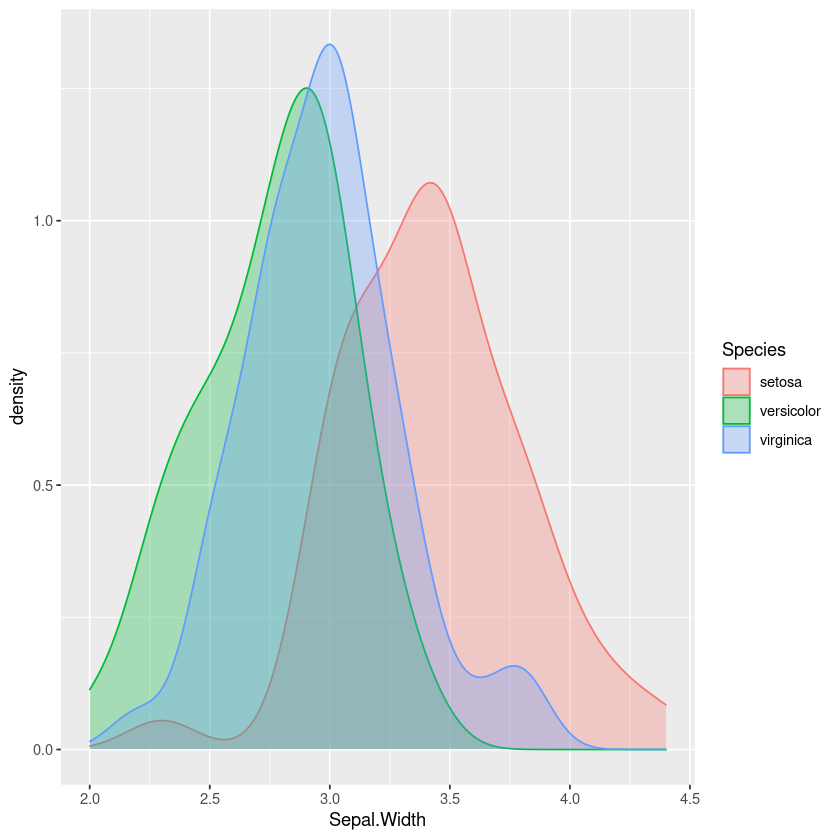

In [8]:
# Group, color, and fill by Species
ggplot(iris, aes(x=Sepal.Width)) +
  geom_density(aes(group=Species, color=Species, fill=Species), alpha=0.3)